In [1]:
from google.cloud import bigquery
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import plotly as px

In [2]:
# Configuración del cliente de BigQuery
client = bigquery.Client()

# Definición de la consulta SQL
query = """
    SELECT * FROM `vanti-poc-440213.data_poc.raw_transacciones`
"""

# Ejecuta la consulta y guarda los resultados en un DataFrame
try:
    dfp = client.query(query).to_dataframe()
    print("Consulta ejecutada exitosamente. Aquí tienes las primeras filas:")
    print(df.head())
except Exception as e:
    print(f"Error al ejecutar la consulta: {e}")

c:\Users\danielpiamba\.conda\envs\CristoEnv\lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Consulta ejecutada exitosamente. Aquí tienes las primeras filas:
Error al ejecutar la consulta: name 'df' is not defined


In [3]:
df = dfp.copy()


Descripción básica:
 count       5000.0
mean         63.53
std      25.030565
min           20.0
25%          42.75
50%           64.0
75%           84.0
max          148.0
Name: consumo_gas, dtype: Float64
Asimetría: 0.13793017212349915
Curtosis: -0.7307981732607685
Outliers:
       id_cliente id_medidor          direccion        ciudad tipo_cliente  \
4256       29549   E738C6E8  Transversal 5 #64  Barranquilla  Residencial   

     tipo_vivienda  consumo_gas numero_cuenta fecha_lectura  lectura_gas  \
4256   Apartamento          148    77BF6E352F    2023-02-04       134.06   

     periodo_facturacion  id_tecnico  
4256          2024-12-01          26  


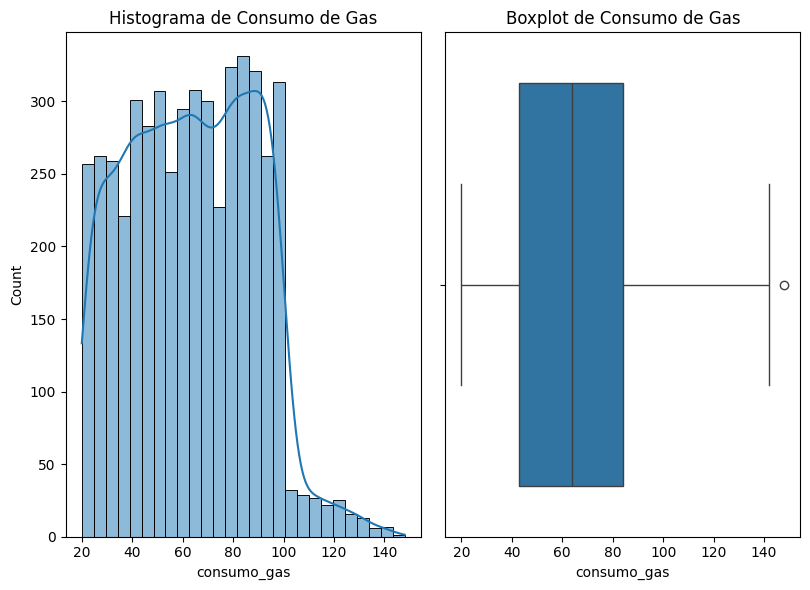

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Estadísticas descriptivas básicas
descripcion = df['consumo_gas'].describe()
print("Descripción básica:\n", descripcion)

# Medidas de forma
asimetria = skew(df['consumo_gas'].dropna())
curtosis = kurtosis(df['consumo_gas'].dropna())
print(f"Asimetría: {asimetria}")
print(f"Curtosis: {curtosis}")

# Valores atípicos usando el rango intercuartílico (IQR)
Q1 = df['consumo_gas'].quantile(0.25)
Q3 = df['consumo_gas'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['consumo_gas'] < Q1 - 1.5 * IQR) | (df['consumo_gas'] > Q3 + 1.5 * IQR)]
print("Outliers:\n", outliers)

# Gráficos
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 3, 1)
sns.histplot(df['consumo_gas'], kde=True)
plt.title('Histograma de Consumo de Gas')

# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['consumo_gas'])
plt.title('Boxplot de Consumo de Gas')

# Línea de tiempo si aplica
if 'fecha' in df.columns:
    plt.subplot(1, 3, 3)
    plt.plot(df['fecha'], df['consumo_gas'])
    plt.title('Consumo de Gas en el Tiempo')

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Calcular medidas estadísticas
media = df['consumo_gas'].mean()
mediana = df['consumo_gas'].median()
moda = df['consumo_gas'].mode().values[0] if not df['consumo_gas'].mode().empty else np.nan
varianza = df['consumo_gas'].var()
desviacion_estandar = df['consumo_gas'].std()
rango = df['consumo_gas'].max() - df['consumo_gas'].min()
percentil_25 = df['consumo_gas'].quantile(0.25)
percentil_50 = df['consumo_gas'].quantile(0.5)
percentil_75 = df['consumo_gas'].quantile(0.75)
asimetria = skew(df['consumo_gas'].dropna())
curtosis_valor = kurtosis(df['consumo_gas'].dropna())

# Crear el DataFrame con las medidas como columnas
estadisticas_df = pd.DataFrame({
    'Media': [media],
    'Mediana': [mediana],
    'Moda': [moda],
    'Varianza': [varianza],
    'Desviación Estándar': [desviacion_estandar],
    'Rango': [rango],
    'Percentil 25': [percentil_25],
    'Percentil 50': [percentil_50],
    'Percentil 75': [percentil_75],
    'Asimetría': [asimetria],
    'Curtosis': [curtosis_valor]
})


In [6]:
estadisticas_df

,Media,Mediana,Moda,Varianza,Desviación Estándar,Rango,Percentil 25,Percentil 50,Percentil 75,Asimetría,Curtosis
0,63.53,64.0,94,626.529206,25.030565,128,42.75,64.0,84.0,0.13793,-0.730798


In [7]:
dfp.head()

,id_cliente,id_medidor,direccion,ciudad,tipo_cliente,tipo_vivienda,consumo_gas,numero_cuenta,fecha_lectura,lectura_gas,periodo_facturacion,id_tecnico
0,43867,143883A8,Avenida Siempreviva #9,Cali,Comercial,Casa,47,8404AEAA90,2023-08-23,182.05,2024-10-01,1
1,23092,593663B9,Transversal 5 #3,Cali,Industrial,Apartamento,62,9DF308CF9B,2023-09-20,182.63,2024-04-01,1
2,18014,39245DBF,Carrera 10 #43,Cali,Residencial,Apartamento,55,5598A66122,2023-12-23,165.73,2024-04-01,1
3,66262,95C359A7,Carrera 10 #28,Cali,Residencial,Local,80,BCF8612FD3,2023-03-23,168.08,2023-10-01,1
4,12925,11BCFE82,Calle Principal #1,Cali,Residencial,Apartamento,82,E789FAB8DF,2023-09-15,294.75,2023-03-01,1


In [8]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Crear un DataFrame vacío para almacenar los resultados
estadisticas_mensuales_df = pd.DataFrame()
df['fecha_lectura'] = pd.to_datetime(df['fecha_lectura'], format='yyyy-mm-dd')
# Iterar sobre cada mes único en la columna 'fecha'
for mes in df['fecha_lectura'].dt.to_period('M').unique():
    # Filtrar los datos para el mes actual
    df_mes = df[df['fecha_lectura'].dt.to_period('M') == mes]

    # Calcular medidas estadísticas para el mes
    media = df_mes['consumo_gas'].mean()
    mediana = df_mes['consumo_gas'].median()
    moda = df_mes['consumo_gas'].mode().values[0] if not df_mes['consumo_gas'].mode().empty else np.nan
    varianza = df_mes['consumo_gas'].var()
    desviacion_estandar = df_mes['consumo_gas'].std()
    rango = df_mes['consumo_gas'].max() - df_mes['consumo_gas'].min()
    percentil_25 = df_mes['consumo_gas'].quantile(0.25)
    percentil_50 = df_mes['consumo_gas'].quantile(0.5)
    percentil_75 = df_mes['consumo_gas'].quantile(0.75)
    asimetria = skew(df_mes['consumo_gas'].dropna())
    curtosis_valor = kurtosis(df_mes['consumo_gas'].dropna())

    # Crear un DataFrame temporal para este mes
    df_temp = pd.DataFrame({
        'Mes': [mes.strftime('%Y-%m')],
        'Media': [media],
        'Mediana': [mediana],
        'Moda': [moda],
        'Varianza': [varianza],
        'Desviación Estándar': [desviacion_estandar],
        'Rango': [rango],
        'Percentil 25': [percentil_25],
        'Percentil 50': [percentil_50],
        'Percentil 75': [percentil_75],
        'Asimetría': [asimetria],
        'Curtosis': [curtosis_valor]
    })

    # Añadir los datos al DataFrame principal
    estadisticas_mensuales_df = pd.concat([estadisticas_mensuales_df, df_temp], ignore_index=True)

# Mostrar el DataFrame resultante
print("Estadísticas mensuales del consumo de gas:\n", estadisticas_mensuales_df)



Estadísticas mensuales del consumo de gas:
         Mes      Media  Mediana  Moda    Varianza  Desviación Estándar  Rango  \
0   2023-08  62.070455     62.0    23  619.760401            24.894987    108   
1   2023-09  64.059102     65.0    70  616.107873            24.821520    120   
2   2023-12  63.237875     61.0    38  683.112266            26.136416    120   
3   2023-03  64.857820     64.0    63  652.858597            25.551098    118   
4   2023-06  63.880597     63.0    72  575.287453            23.985151    116   
5   2023-07  64.504505     64.0    27  713.537226            26.712118    122   
6   2023-02  63.458763     62.0    79  660.347132            25.697220    128   
7   2023-01  64.133183     67.0    69  608.138331            24.660461    109   
8   2023-05  62.927536     65.0    83  597.529845            24.444424    111   
9   2023-10  62.631443     62.0    49  560.843143            23.682127     98   
10  2023-04  62.284615     63.0    25  610.173285            24.7

In [9]:
estadisticas_mensuales_df

,Mes,Media,Mediana,Moda,Varianza,Desviación Estándar,Rango,Percentil 25,Percentil 50,Percentil 75,Asimetría,Curtosis
0,2023-08,62.070455,62.0,23,619.760401,24.894987,108,41.00,62.0,83.0,0.054415,-0.994013
1,2023-09,64.059102,65.0,70,616.107873,24.821520,120,42.50,65.0,85.0,0.027167,-0.773138
2,2023-12,63.237875,61.0,38,683.112266,26.136416,120,41.00,61.0,84.0,0.268693,-0.647928
3,2023-03,64.857820,64.0,63,652.858597,25.551098,118,44.25,64.0,85.0,0.216370,-0.638789
4,2023-06,63.880597,63.0,72,575.287453,23.985151,116,45.00,63.0,84.0,0.136301,-0.786065
5,2023-07,64.504505,64.0,27,713.537226,26.712118,122,41.00,64.0,85.0,0.270654,-0.484084
6,2023-02,63.458763,62.0,79,660.347132,25.697220,128,43.00,62.0,83.0,0.329540,-0.340952
7,2023-01,64.133183,67.0,69,608.138331,24.660461,109,44.00,67.0,85.0,-0.046053,-1.005113
8,2023-05,62.927536,65.0,83,597.529845,24.444424,111,42.25,65.0,83.0,0.025045,-0.912232
9,2023-10,62.631443,62.0,49,560.843143,23.682127,98,44.75,62.0,82.0,-0.026253,-1.039285


In [10]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

df = dfp.copy()

# Crear un DataFrame vacío para almacenar los resultados
estadisticas_mensuales_df = pd.DataFrame()
df['fecha_lectura'] = pd.to_datetime(df['fecha_lectura'], format='yyyy-mm-dd')

# Iterar sobre cada mes único en la columna 'fecha'
for mes in df['fecha_lectura'].dt.to_period('M').unique():
    # Filtrar los datos para el mes actual
    df_mes = df[df['fecha_lectura'].dt.to_period('M') == mes]

    # Calcular medidas estadísticas para el mes
    media = df_mes['consumo_gas'].mean()
    mediana = df_mes['consumo_gas'].median()
    moda = df_mes['consumo_gas'].mode().values[0] if not df_mes['consumo_gas'].mode().empty else np.nan
    varianza = df_mes['consumo_gas'].var()
    desviacion_estandar = df_mes['consumo_gas'].std()
    rango = df_mes['consumo_gas'].max() - df_mes['consumo_gas'].min()
    percentil_25 = df_mes['consumo_gas'].quantile(0.25)
    percentil_50 = df_mes['consumo_gas'].quantile(0.5)
    percentil_75 = df_mes['consumo_gas'].quantile(0.75)
    asimetria = skew(df_mes['consumo_gas'].dropna())
    curtosis_valor = kurtosis(df_mes['consumo_gas'].dropna())

    # Calcular IQR y los límites inferior y superior del diagrama de bigotes
    iqr = percentil_75 - percentil_25
    limite_inferior = percentil_25 - 1.5 * iqr
    limite_superior = percentil_75 + 1.5 * iqr

    # Obtener el año y el mes numérico
    año = mes.year
    mes_num = mes.month

    # Crear un DataFrame temporal para este mes
    df_temp = pd.DataFrame({
        'Mes': [mes_num],
        'Año': [año],
        'Media': [media],
        'Mediana': [mediana],
        'Moda': [moda],
        'Varianza': [varianza],
        'Desviación Estándar': [desviacion_estandar],
        'Rango': [rango],
        'Percentil 25': [percentil_25],
        'Percentil 50': [percentil_50],
        'Percentil 75': [percentil_75],
        'Asimetría': [asimetria],
        'Curtosis': [curtosis_valor],
        'Limite Inferior': [limite_inferior],
        'Limite Superior': [limite_superior]
    })

    # Añadir los datos al DataFrame principal
    estadisticas_mensuales_df = pd.concat([estadisticas_mensuales_df, df_temp], ignore_index=True)



estadisticas_mensuales_df


,Mes,Año,Media,Mediana,Moda,Varianza,Desviación Estándar,Rango,Percentil 25,Percentil 50,Percentil 75,Asimetría,Curtosis,Limite Inferior,Limite Superior
0,8,2023,62.070455,62.0,23,619.760401,24.894987,108,41.00,62.0,83.0,0.054415,-0.994013,-22.000,146.000
1,9,2023,64.059102,65.0,70,616.107873,24.821520,120,42.50,65.0,85.0,0.027167,-0.773138,-21.250,148.750
2,12,2023,63.237875,61.0,38,683.112266,26.136416,120,41.00,61.0,84.0,0.268693,-0.647928,-23.500,148.500
3,3,2023,64.857820,64.0,63,652.858597,25.551098,118,44.25,64.0,85.0,0.216370,-0.638789,-16.875,146.125
4,6,2023,63.880597,63.0,72,575.287453,23.985151,116,45.00,63.0,84.0,0.136301,-0.786065,-13.500,142.500
5,7,2023,64.504505,64.0,27,713.537226,26.712118,122,41.00,64.0,85.0,0.270654,-0.484084,-25.000,151.000
6,2,2023,63.458763,62.0,79,660.347132,25.697220,128,43.00,62.0,83.0,0.329540,-0.340952,-17.000,143.000
7,1,2023,64.133183,67.0,69,608.138331,24.660461,109,44.00,67.0,85.0,-0.046053,-1.005113,-17.500,146.500
8,5,2023,62.927536,65.0,83,597.529845,24.444424,111,42.25,65.0,83.0,0.025045,-0.912232,-18.875,144.125
9,10,2023,62.631443,62.0,49,560.843143,23.682127,98,44.75,62.0,82.0,-0.026253,-1.039285,-11.125,137.875


In [11]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Configura el rango de fechas que deseas analizar
año_inicio = 2023
mes_inicio = 1  
año_fin = 2023
mes_fin = 12

# Crear un DataFrame vacío para almacenar los resultados
estadisticas_df = {}

# Convertir los rangos a períodos
periodo_inicio = pd.Period(year=año_inicio, month=mes_inicio, freq='M')
periodo_fin = pd.Period(year=año_fin, month=mes_fin, freq='M')

# Filtrar los datos dentro del rango especificado
df['fecha_lectura'] = pd.to_datetime(df['fecha_lectura'], format='yyyy-mm-dd')
df_filtrado = df[(df['fecha_lectura'].dt.to_period('M') >= periodo_inicio) & 
                  (df['fecha_lectura'].dt.to_period('M') <= periodo_fin)]

# Calcular medidas estadísticas para el periodo filtrado
if not df_filtrado.empty:
    media = df_filtrado['consumo_gas'].mean()
    mediana = df_filtrado['consumo_gas'].median()
    moda = df_filtrado['consumo_gas'].mode().values[0] if not df_filtrado['consumo_gas'].mode().empty else np.nan
    varianza = df_filtrado['consumo_gas'].var()
    desviacion_estandar = df_filtrado['consumo_gas'].std()
    rango = df_filtrado['consumo_gas'].max() - df_filtrado['consumo_gas'].min()
    percentil_25 = df_filtrado['consumo_gas'].quantile(0.25)
    percentil_50 = df_filtrado['consumo_gas'].quantile(0.5)
    percentil_75 = df_filtrado['consumo_gas'].quantile(0.75)
    asimetria = skew(df_filtrado['consumo_gas'].dropna())
    curtosis_valor = kurtosis(df_filtrado['consumo_gas'].dropna())

    # Calcular IQR y los límites inferior y superior del diagrama de bigotes
    iqr = percentil_75 - percentil_25
    limite_inferior = percentil_25 - 1.5 * iqr
    limite_superior = percentil_75 + 1.5 * iqr

    # Almacenar los resultados en el diccionario
    estadisticas_df = {
        'Media': media,
        'Mediana': mediana,
        'Moda': moda,
        'Varianza': varianza,
        'Desviación Estándar': desviacion_estandar,
        'Rango': rango,
        'Percentil 25': percentil_25,
        'Percentil 50': percentil_50,
        'Percentil 75': percentil_75,
        'Asimetría': asimetria,
        'Curtosis': curtosis_valor,
        'Limite Inferior': limite_inferior,
        'Limite Superior': limite_superior
    }
estadisticas_df


{'Media': np.float64(63.53),
 'Mediana': np.float64(64.0),
 'Moda': np.int64(94),
 'Varianza': np.float64(626.5292058411683),
 'Desviación Estándar': np.float64(25.03056543191081),
 'Rango': np.int64(128),
 'Percentil 25': np.float64(42.75),
 'Percentil 50': np.float64(64.0),
 'Percentil 75': np.float64(84.0),
 'Asimetría': np.float64(0.13793017212349915),
 'Curtosis': np.float64(-0.7307981732607685),
 'Limite Inferior': np.float64(-19.125),
 'Limite Superior': np.float64(145.875)}

In [12]:
from google.cloud import dataplex_v1
from google.oauth2 import service_account

client = dataplex_v1.DataplexServiceClient()

metadata_service_client = dataplex_v1.MetadataServiceClient()
data_scan_client = dataplex_v1.DataScanServiceClient()

# Proyecto
project_id = 'vanti-poc-440213'
location = 'us-central1'  # Reemplaza con tu ubicación

parent = f"projects/{project_id}/locations/{location}"

In [37]:
# Listar los lagos
lakes = client.list_lakes(parent=parent)

print("Lagos en el Proyecto:")
for lake in lakes:
    print(f"\nLago: {lake.name}")
    
    # Listar las zonas en el lago
    zones = client.list_zones(parent=lake.name)
    for zone in zones:
        print(f"  Zona: {zone.name}")
        
        # Listar las entidades en la zona
        entities = metadata_service_client.list_entities(parent=zone.name)
        for entity in entities:
            print(f"    Entidad: {entity.name}")
            
            # Aquí podrías obtener más detalles de la entidad si es necesario
            
# Listar los DataScans de Calidad de Datos
data_scans = data_scan_client.list_data_scans(parent=parent)

print("\nDataScans de Calidad de Datos:")
for data_scan in data_scans:
    # Verificar si es un DataScan de calidad de datos
    if data_scan.data_quality_spec is not None:
        print(f"\nDataScan ID: {data_scan.name}")
        # Obtener detalles del DataScan
        data_scan_detail = data_scan_client.get_data_scan(name=data_scan.name)
        # Acceder a las reglas de calidad
        quality_spec = data_scan_detail.data_quality_spec
        for rule in quality_spec.rules:
            print(f"  - Regla: {rule.rule_type}")

Lagos en el Proyecto:

Lago: projects/vanti-poc-440213/locations/us-central1/lakes/lake-poc
  Zona: projects/vanti-poc-440213/locations/us-central1/lakes/lake-poc/zones/raw
    Entidad: projects/891624744651/locations/us-central1/lakes/lake-poc/zones/raw/entities/raw_transacciones
    Entidad: projects/891624744651/locations/us-central1/lakes/lake-poc/zones/raw/entities/raw_customers
    Entidad: projects/891624744651/locations/us-central1/lakes/lake-poc/zones/raw/entities/raw_seguimientos

DataScans de Calidad de Datos:

DataScan ID: projects/vanti-poc-440213/locations/us-central1/dataScans/raw-customer-data-quality-scan

DataScan ID: projects/vanti-poc-440213/locations/us-central1/dataScans/raw-customers-profile-scan

DataScan ID: projects/vanti-poc-440213/locations/us-central1/dataScans/raw-transacciones-data-quality-scan

DataScan ID: projects/vanti-poc-440213/locations/us-central1/dataScans/raw-profile-scan


In [39]:
from google.cloud import dataplex_v1

# Configurar el cliente
data_scan_client = dataplex_v1.DataScanServiceClient()

# Especifica tu proyecto, ubicación y DataScan
project_id = 'vanti-poc-440213'
location = 'us-central1'
data_scan_id = 'raw-transacciones-data-quality-scan'
data_scan_name = f"projects/{project_id}/locations/{location}/dataScans/{data_scan_id}"

# Obtener el DataScan
data_scan = data_scan_client.get_data_scan(name=data_scan_name)

# Filtrar reglas activas
reglas_activas = [rule for rule in data_scan.data_quality_spec.rules if rule.state == dataplex_v1.DataQualityRule.State.ACTIVE]

# Mostrar reglas activas
print("Reglas activas:")
for rule in reglas_activas:
    print(f"Regla ID: {rule.id}, Tipo: {rule.rule_type}, Estado: {rule.state}")


Reglas activas:


In [32]:
from google.cloud import dataplex_v1
from google.cloud.dataplex_v1 import DataQualityRule

# Configurar el cliente
data_scan_client = dataplex_v1.DataScanServiceClient()

# Especifica tu proyecto, ubicación y DataScan
project_id = 'vanti-poc-440213'
location = 'us-central1'
data_scan_id = 'raw-transacciones-data-quality-scan'
data_scan_name = f"projects/{project_id}/locations/{location}/dataScans/{data_scan_id}"

# Obtener el DataScan
data_scan = data_scan_client.get_data_scan(name=data_scan_name)

# Filtrar reglas activas
reglas_activas = [rule for rule in data_scan.data_quality_spec.rules if rule.state == dataplex_v1.DataQualityRule.State.ACTIVE]

# Mostrar reglas activas
print("Reglas activas:")
for rule in reglas_activas:
    print(f"Regla ID: {rule.id}, Tipo: {rule.rule_type}, Estado: {rule.state}")

# Crear una nueva regla de rango para 'consumo_gas'
rango_minimo = 10  # Cambia esto al valor mínimo deseado
rango_maximo = 100  # Cambia esto al valor máximo deseado

nueva_regla_rango = DataQualityRule(name='projects/{project_id}/locations/{location}/dataScans/{data_scan_id}',
                                         column='consumo_gas',
                                         range={'min_value':rango_minimo,'max_value':rango_maximo}) 
data_scan.data_quality_spec.rules.append(nueva_regla_rango)

# Agregar la nueva regla a las reglas existentes
data_scan.data_quality_spec.rules.append(nueva_regla_rango)

# Actualizar el DataScan con la nueva regla
data_scan_client.update_data_scan(data_scan)

print(f"Se ha agregado la regla de rango para 'consumo_gas' con rango [{rango_minimo}, {rango_maximo}].")


Reglas activas:


ValueError: Unknown field for DataQualityRule: range

In [38]:
# Listar los DataScans de Calidad de Datos
data_scans = data_scan_client.list_data_scans(parent=parent)

print("\nDataScans de Calidad de Datos:")
for data_scan in data_scans:
    if data_scan.data_quality_spec is not None:
        print(f"\nDataScan ID: {data_scan.name}")
        try:
            data_scan_detail = data_scan_client.get_data_scan(name=data_scan.name)
            quality_spec = data_scan_detail.data_quality_spec
            
            if quality_spec.rules:
                for rule in quality_spec.rules:
                    print(f"  - Regla: {rule.rule_type}")
            else:
                print("  - No hay reglas de calidad definidas.")
        except Exception as e:
            print(f"  - Error al obtener detalles del DataScan: {e}")
    else:
        print(f"  - DataScan ID: {data_scan.name} no tiene especificaciones de calidad.")



DataScans de Calidad de Datos:

DataScan ID: projects/vanti-poc-440213/locations/us-central1/dataScans/raw-customer-data-quality-scan
  - No hay reglas de calidad definidas.

DataScan ID: projects/vanti-poc-440213/locations/us-central1/dataScans/raw-customers-profile-scan
  - No hay reglas de calidad definidas.

DataScan ID: projects/vanti-poc-440213/locations/us-central1/dataScans/raw-transacciones-data-quality-scan
  - No hay reglas de calidad definidas.

DataScan ID: projects/vanti-poc-440213/locations/us-central1/dataScans/raw-profile-scan
  - No hay reglas de calidad definidas.


In [ ]:
from google.cloud import dataplex_v1
from google.protobuf import field_mask_pb2

# Configurar el cliente
data_scan_client = dataplex_v1.DataScanServiceClient()

# Especifica tu proyecto, ubicación y DataScan
project_id = 'vanti-poc-440213'
location = 'us-central1'
data_scan_id = 'raw-transacciones-data-quality-scan'
data_scan_name = f"projects/{project_id}/locations/{location}/dataScans/{data_scan_id}"

# Obtener el DataScan
data_scan = data_scan_client.get_data_scan(name=data_scan_name)

n_data_scan_name = data_scan.name

# Identificar la regla a modificar
index = None
for idx, rule in enumerate(data_scan.data_quality_spec.rules):
    if rule.rule_type == dataplex_v1.DataQualityRule.RuleType.NULL_EXPECTATION:
        # Suponiendo que queremos modificar esta regla
        index = idx
        break

if index is not None:
    # Modificar el parámetro deseado
    data_scan.data_quality_spec.rules[index].threshold = 0.95  # Nuevo umbral

    # Especificar los campos que han cambiado
    update_mask = field_mask_pb2.FieldMask(paths=["data_quality_spec.rules"])

    # Crear el DataScan actualizado
    updated_data_scan = dataplex_v1.DataScan(
        name=data_scan.name,
        data_quality_spec=data_scan.data_quality_spec,
    )

    # Realizar la actualización
    operation = data_scan_client.update_data_scan(
        data_scan=updated_data_scan,
        update_mask=update_mask,
    )

    # Esperar a que la operación se complete
    result = operation.result()

    print("La regla de calidad de datos ha sido actualizada exitosamente.")

    # Verificar el cambio
    updated_data_scan = data_scan_client.get_data_scan(name=data_scan_name)
    updated_rule = updated_data_scan.data_quality_spec.rules[index]
    print(f"Nuevo Umbral: {updated_rule.threshold}")
else:
    print("No se encontró la regla especificada para modificar.")

No se encontró la regla especificada para modificar.


In [43]:
data_scan = data_scan_client.get_data_scan(name=data_scan_name)
data_scan.name

'projects/vanti-poc-440213/locations/us-central1/dataScans/raw-transacciones-data-quality-scan'

In [47]:
data_scan_client.get_data_scan(f"projects/vanti-poc-440213/locations/us-central1/dataScans/raw-transacciones-data-quality-scan")

TypeError: Invalid constructor input for GetDataScanRequest: 'projects/vanti-poc-440213/locations/us-central1/dataScans/raw-transacciones-data-quality-scan'

In [48]:
import google.cloud.dataplex_v1 as dataplex

# Configure the client (assuming you have authentication set up)
data_scan_client = dataplex.DataScanServiceClient()

# Specify your project, location, and DataScan
project_id = 'vanti-poc-440213'
location = 'us-central1'
data_scan_id = 'raw-transacciones-data-quality-scan'
data_scan_name = f"projects/{project_id}/locations/{location}/dataScans/{data_scan_id}"

# Get the DataScan and print its type and parameters
try:
  data_scan = data_scan_client.get_data_scan(name=data_scan_name)
  print(f"DataScan Type: {type(data_scan)}")

  # Access and print relevant parameters from data_scan (replace with desired fields)
  print(f"DataScan ID: {data_scan.name.split('/')[-1]}")  # Extract ID from name
  print(f"DataScan Create Time: {data_scan.create_time.strftime('%Y-%m-%d %H:%M:%S')}")  # Format create time

except Exception as e:
  print(f"An error occurred: {e}")

DataScan Type: <class 'google.cloud.dataplex_v1.types.datascans.DataScan'>
DataScan ID: raw-transacciones-data-quality-scan
DataScan Create Time: 2024-11-01 12:52:20


In [61]:
import google.cloud.dataplex_v1 as dataplex 

# Configure the client (assuming you have authentication set up)
data_scan_client = dataplex.DataScanServiceClient()

# Specify your project, location, and DataScan
project_id = 'vanti-poc-440213'
location = 'us-central1'
data_scan_id = 'raw-transacciones-data-quality-scan'
data_scan_name = f"projects/{project_id}/locations/{location}/dataScans/{data_scan_id}"

# Get the DataScan and print its type and parameters
try:
    data_scan = data_scan_client.get_data_scan(name=data_scan_name)
    print(f"DataScan Type: {type(data_scan)}")

    # Access and print relevant parameters from data_scan (replace with desired fields)
    print(f"DataScan ID: {data_scan.name.split('/')[-1]}")  # Extract ID from name
    print(f"DataScan Create Time: {data_scan.create_time.strftime('%Y-%m-%d %H:%M:%S')}")  # Format create time
    
    # Assuming you want to access the rules (e.g., data quality rules)
    if data_scan.data_quality_spec:
        print("Data Quality Rules:")
        for rule in data_scan.data_quality_spec.rules:
            print(f"- Rule ID: {rule.rule_id}")
            print(f"  Description: {rule.description}")
            print(f"  Severity: {rule.severity}")
            # You can add more fields as necessary, depending on the rule structure
    else:
        print("No data quality specifications found in this DataScan.")

except Exception as e:
    print(f"An error occurred: {e}")


DataScan Type: <class 'google.cloud.dataplex_v1.types.datascans.DataScan'>
DataScan ID: raw-transacciones-data-quality-scan
DataScan Create Time: 2024-11-01 12:52:20
No data quality specifications found in this DataScan.


In [63]:
from google.cloud import dataplex_v1

# Autentica tu cliente. Reemplaza 'ruta/a/tu/archivo_credenciales.json' con la ruta a tu archivo de credenciales.
client = dataplex_v1.DataplexServiceClient.from_service_account_json(r'c:\Users\danielpiamba\Downloads\vanti-poc-440213-e5ddc44ddc21.json')

In [64]:
# Define la regla.  Ajusta los valores según tus necesidades.
regla = dataplex_v1.DataQualityRule(
    row_condition='cantidad_total > 0',  # Condición que deben cumplir las filas
    rule_type=dataplex_v1.DataQualityRule.RuleType.ROW_CONDITION,  # Tipo de regla
)

AttributeError: type object 'DataQualityRule' has no attribute 'RuleType'

In [65]:
dataplex_v1.DataQualityRule.RangeExpectation

google.cloud.dataplex_v1.types.data_quality.DataQualityRule.RangeExpectation

In [66]:
# Define la ubicación donde se creará la regla. Reemplaza los valores con tu proyecto y ubicación.
parent = f'projects/{project_id}/locations/{location}'

# Llama al método 'create_data_quality_rule' para crear la regla.
request = dataplex_v1.CreateDataQualityRuleRequest(
    parent=parent,
    data_quality_rule=regla,
    data_quality_rule_id='regla_python',  # ID de la regla
)
regla_creada = client.create_data_quality_rule(request=request)

# Imprime la regla creada
print(f'Regla creada: {regla_creada.name}')

AttributeError: module 'google.cloud.dataplex_v1' has no attribute 'CreateDataQualityRuleRequest'

In [71]:
from google.cloud import dataplex_v1

# Reemplaza 'ruta/a/tu/archivo_credenciales.json' con la ruta a tu archivo de credenciales.
client = dataplex_v1.DataplexServiceClient.from_service_account_json(
    r'c:\Users\danielpiamba\Downloads\vanti-poc-440213-e5ddc44ddc21.json'
)

# Define la regla de calidad de datos. Ajusta los valores según tus necesidades.
regla = dataplex_v1.DataQualityResult(
    row_condition='cantidad_total > 0',  # Condición que deben cumplir las filas
    rule_type=dataplex_v1.DataQualityRule.RuleType.ROW_CONDITION,  # Tipo de regla
)

# Define la ubicación donde se creará la regla. 
# Reemplaza '<tu_proyecto>' y '<tu_ubicacion>' con los valores de tu proyecto y ubicación.
parent = f'projects/<tu_proyecto>/locations/<tu_ubicacion>'

# Llama al método 'create_data_quality_rule' para crear la regla.
request = dataplex_v1.CreateDataQualityRuleRequest(
    parent=parent,
    data_quality_rule=regla,
    data_quality_rule_id='regla_python',  # ID de la regla
)
regla_creada = client.create_data_quality_rule(request=request)

# Imprime la regla creada
print(f'Regla creada: {regla_creada.name}')

AttributeError: type object 'DataQualityRule' has no attribute 'RuleType'

In [70]:
from google.cloud import dataplex_v1

# Reemplaza 'ruta/a/tu/archivo_credenciales.json' con la ruta a tu archivo de credenciales.
client = dataplex_v1.DataplexServiceClient.from_service_account_json(
    r'c:\Users\danielpiamba\Downloads\vanti-poc-440213-e5ddc44ddc21.json'
)

# Define la regla de calidad de datos. Ajusta los valores según tus necesidades.
regla = dataplex_v1.DataQualityRule(
    row_condition='cantidad_total > 0',  # Condición que deben cumplir las filas
    rule_type='ROW_CONDITION',  # Ajusta el valor según la documentación
)

# Define la ubicación donde se creará la regla.
# Reemplaza '<tu_proyecto>' y '<tu_ubicacion>' con los valores de tu proyecto y ubicación.
parent = f'projects/vanti-poc-440213/locations/us-central1'  # Ejemplo

# Llama al método 'create_data_quality_rule' para crear la regla.
request = dataplex_v1.CreateDataQualityRuleRequest(
    parent=parent,
    data_quality_rule=regla,
    data_quality_rule_id='regla_python',  # ID de la regla
)
regla_creada = client.create_data_quality_rule(request=request)

# Imprime la regla creada
print(f'Regla creada: {regla_creada.name}')

ValueError: Unknown field for DataQualityRule: row_condition